In [2]:
from pylab import *
import matplotlib as mpl
import seaborn as sns
sys.path.append('/Users/ban115/bolton/craft/code/python') # for calc11

import calc11

import numpy as np
from scipy import constants
import fdmt # you'll need to have ../python in  you PYTHONPATH
reload(fdmt)
import craco_kernels
%matplotlib inline

(0, 2)

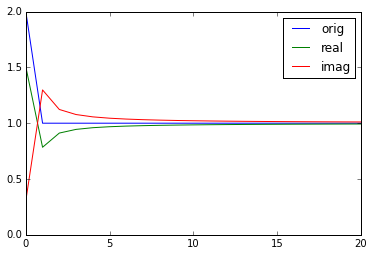

In [188]:
def shiftdelta(shift, N=1024):
    x = np.zeros(N, dtype=np.float32)
    x[0]= 1
    xf = np.fft.fft(x)
    s = shift
    phase = np.arange(N, dtype=np.float32)*float(s)/float(N)
    xfshifted = xf * np.exp(-2*np.pi*1j*phase)
    xshifted = np.fft.ifft(xfshifted)
    return xshifted

xshifted = shiftdelta(0.3)
plot(shiftdelta(0).real+1, label='orig')
plot(xshifted.real+1, label='real')
plot(xshifted.imag+1, label='imag')
legend()
xlim(0,20)
ylim(0,2)

2.0
2.1
2.2
2.3
2.4
2.5


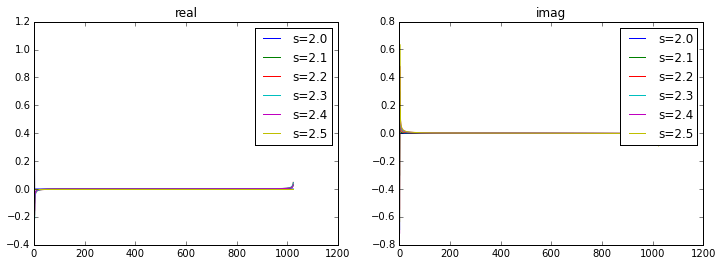

In [189]:
N = 16
fig, ax = subplots(1,2)
fig.set_size_inches([12,4])
offsets = np.arange(0,0.6,0.1) + 2
d = []
for s in offsets:
    print(s)
    xshifted = shiftdelta(s)
    d.append(xshifted)
    #ax[0].plot(x, label='orig')
    ax[0].plot(xshifted.real, label='s=%0.1f'%s)
    ax[1].plot(xshifted.imag, label='s=%0.1f'%s)
ax[0].legend()
ax[1].legend()
ax[0].set_title('real')
ax[1].set_title('imag')
d = np.array(d).T
#xlim(0,20)
#ylim(0,2)

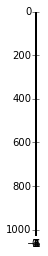

In [190]:
imshow(d.real)

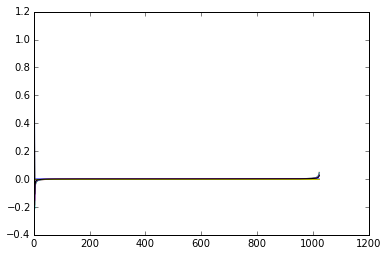

In [191]:
plot(d.real)
plot(d.real.mean(axis=1), 'k')

[1.39642444 0.86575525] [[ 1.45453856e-05 -8.41735267e-06]
 [-8.41735267e-06  5.56554648e-06]]

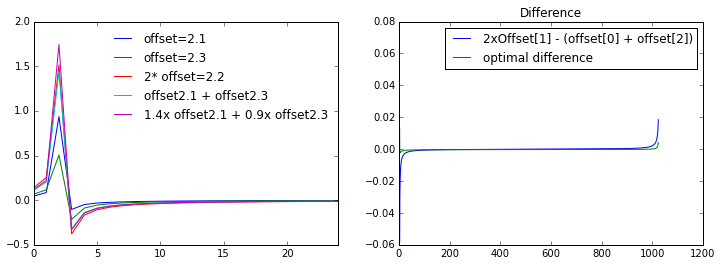

In [192]:
import scipy.optimize 
f  = lambda x, a1, a2: d[:,3].real*a1 + d[:,1].real*a2
popt, pcov = scipy.optimize.curve_fit(f, None,2*d[:,2].real, [1.0, 1.0]  )
print(popt, pcov, end=' ')
fig, ax = subplots(1,2)
fig.set_size_inches(12,4)
ax[0].plot(d[:,1].real, label='offset=%0.1f'%offsets[1])
ax[0].plot(d[:,3].real, label='offset=%0.1f'%offsets[3])
ax[0].plot(2*d[:,2].real, label='2* offset={offsets[2]}'.format(**locals()))
ax[0].plot(d[:,1].real + d[:,3].real, label='offset{offsets[1]} + offset{offsets[3]}'.format(**locals()))
ax[0].plot(d[:,1].real*popt[0] + d[:,3].real*popt[1], label='{popt[0]:0.1f}x offset{offsets[1]} + {popt[1]:0.1f}x offset{offsets[3]}'.format(**locals()))
ax[0].legend(frameon=False)
ax[0].set_xlim(0,24)

ax[1].plot(2*d[:,2].real - (d[:,3].real + d[:,1].real), label='2xOffset[1] - (offset[0] + offset[2])')
ax[1].plot(2*d[:,2].real - (d[:,3].real*popt[0] + d[:,1].real*popt[1]), label='optimal difference')
ax[1].legend()
ax[1].set_title('Difference')

('Optimal coefficiets', array([ 2.09606451e-01,  8.64996091e-01, -6.08301933e-02, -5.53980849e-03,
       -2.39320635e-03, -1.05548943e-03, -7.54045296e-04]))


(1000, 1024)

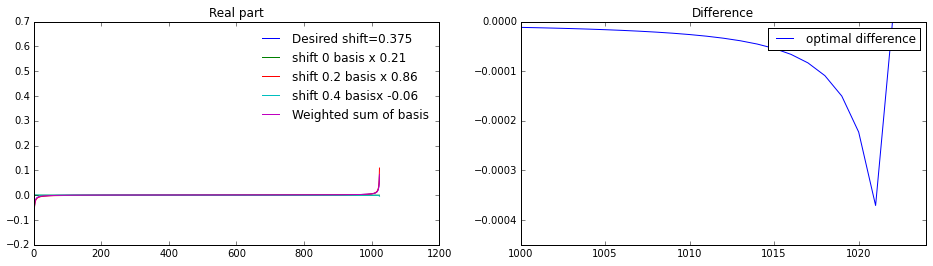

In [209]:
import scipy.optimize 
f  = lambda x, a0, a1, a2, a3, a4,a5,a6: \
    a0*shiftdelta(0.2).real + \
    a1*shiftdelta(0.4).real +\
    a2*shiftdelta(0.0).real + \
    a3*shiftdelta(1).real + \
    a4*shiftdelta(-1).real + \
    a5*shiftdelta(2).real + \
    a6*shiftdelta(-2).real 


target_shift = 0.375
target = shiftdelta(target_shift).real
popt, pcov = scipy.optimize.curve_fit(f, None, target, np.ones(7)  )
fig, ax = subplots(1,2)
fig.set_size_inches(16,4)
print(('Optimal coefficiets', popt))
ax[0].plot(target, label='Desired shift=%0.3f'%target_shift)
ax[0].plot(popt[0]*shiftdelta(0.0).real, label='shift 0 basis x {popt[0]:0.2f}'.format(**locals()))
ax[0].plot(popt[1]*shiftdelta(0.2).real, label='shift 0.2 basis x {popt[1]:0.2f}'.format(**locals()))
ax[0].plot(popt[2]*shiftdelta(0.4).real, label='shift 0.4 basisx {popt[2]:0.2f}'.format(**locals()))
ax[0].plot(f(None, *popt), label='Weighted sum of basis'.format(**locals()))

ax[0].set_title('Real part')
ax[0].legend(frameon=False)

ax[1].plot((target - f(None, *popt)), label='optimal difference')
ax[1].legend()
ax[1].set_title('Difference')
ax[1].set_xlim(1000,1024)

[-0.03354346  0.13710379  0.98260643] [[ 5.94382041e-07 -1.32072288e-06  1.76783708e-06]
 [-1.32072288e-06  3.04705637e-06 -4.20181325e-06]
 [ 1.76783708e-06 -4.20181325e-06  6.02169074e-06]]

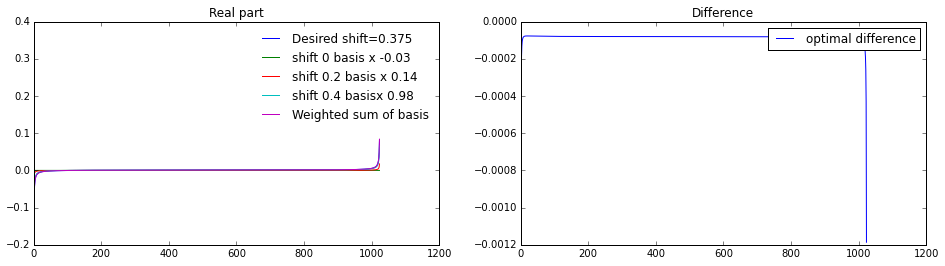

In [194]:
import scipy.optimize 
f  = lambda x, a0, a1, a2: a0*shiftdelta(0.0).real + a1*shiftdelta(0.2).real + a2*shiftdelta(0.4).real 
target_shift = 0.375
target = shiftdelta(target_shift).real
popt, pcov = scipy.optimize.curve_fit(f, None, target, np.ones(3)  )
print(popt, pcov, end=' ')
fig, ax = subplots(1,2)
fig.set_size_inches(16,4)
ax[0].plot(target, label='Desired shift=%0.3f'%target_shift)
ax[0].plot(popt[0]*shiftdelta(0.0).real, label='shift 0 basis x {popt[0]:0.2f}'.format(**locals()))
ax[0].plot(popt[1]*shiftdelta(0.2).real, label='shift 0.2 basis x {popt[1]:0.2f}'.format(**locals()))
ax[0].plot(popt[2]*shiftdelta(0.4).real, label='shift 0.4 basisx {popt[2]:0.2f}'.format(**locals()))
ax[0].plot(f(None, *popt), label='Weighted sum of basis'.format(**locals()))

ax[0].set_title('Real part')
ax[0].legend(frameon=False)

ax[1].plot((target - f(None, *popt)), label='optimal difference')
ax[1].legend()
ax[1].set_title('Difference')

[-0.29211076  0.86027664  9.90441324 -0.26391102] [[ 2.04633538e-05 -1.34862447e-05  1.31843820e+03  3.51308260e+01]
 [-1.34862446e-05  1.10478831e-05 -1.10814977e+03 -2.95275304e+01]
 [ 1.31843918e+03 -1.10815035e+03 -1.50215678e+13 -4.00261699e+11]
 [ 3.51308511e+01 -2.95275449e+01 -4.00261699e+11 -1.06652934e+10]]

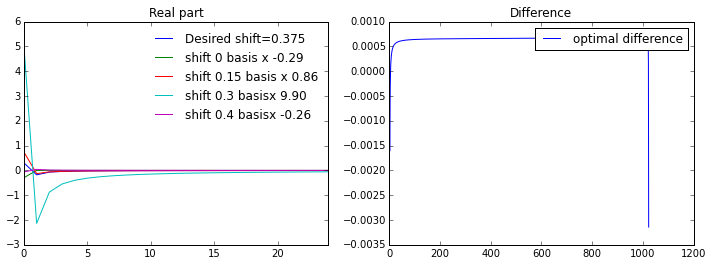

In [195]:
import scipy.optimize 
f  = lambda x, a0, a1, a2, a3: a0*shiftdelta(0.0).real + a1*shiftdelta(0.15).real + a2*shiftdelta(0.3).real * a3*shiftdelta(0.45).real
target_shift = (0.3+0.45)/2.0
target = shiftdelta(target_shift).real
popt, pcov = scipy.optimize.curve_fit(f, None, target, np.ones(4)  )
print(popt, pcov, end=' ')
fig, ax = subplots(1,2)
fig.set_size_inches(12,4)
ax[0].plot(target, label='Desired shift=%0.3f'%target_shift)
ax[0].plot(popt[0]*shiftdelta(0.0).real, label='shift 0 basis x {popt[0]:0.2f}'.format(**locals()))
ax[0].plot(popt[1]*shiftdelta(0.15).real, label='shift 0.15 basis x {popt[1]:0.2f}'.format(**locals()))
ax[0].plot(popt[2]*shiftdelta(0.3).real, label='shift 0.3 basisx {popt[2]:0.2f}'.format(**locals()))
ax[0].plot(popt[3]*shiftdelta(0.4).real, label='shift 0.4 basisx {popt[3]:0.2f}'.format(**locals()))

ax[0].set_title('Real part')
ax[0].legend(frameon=False)
ax[0].set_xlim(0,24)

ax[1].plot((target - f(None, *popt)), label='optimal difference')
ax[1].legend()
ax[1].set_title('Difference')

[0.6367532  0.36323687] [[ 9.25101484e-05 -9.25078490e-05]
 [-9.25078490e-05  9.47303899e-02]]

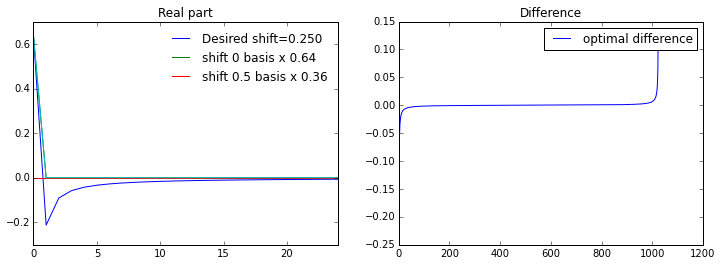

In [196]:
import scipy.optimize 
f  = lambda x, a0, a1: a0*shiftdelta(0.0).real + a1*shiftdelta(0.5).real
target_shift = 0.25
target = shiftdelta(target_shift).real
popt, pcov = scipy.optimize.curve_fit(f, None, target, np.ones(2)  )
print(popt, pcov, end=' ')
fig, ax = subplots(1,2)
fig.set_size_inches(12,4)
ax[0].plot(target, label='Desired shift=%0.3f'%target_shift)
ax[0].plot(popt[0]*shiftdelta(0.0).real, label='shift 0 basis x {popt[0]:0.2f}'.format(**locals()))
ax[0].plot(popt[1]*shiftdelta(0.5).real, label='shift 0.5 basis x {popt[1]:0.2f}'.format(**locals()))
ax[0].plot(f(None, *popt))
ax[0].set_title('Real part')
ax[0].legend(frameon=False)
ax[0].set_xlim(0,24)

ax[1].plot((target - f(None, *popt)), label='optimal difference')
ax[1].legend()
ax[1].set_title('Difference')